<a href="https://colab.research.google.com/github/ShamimShahraeini/Deep-CNNs-for-image-classification-by-exploiting-transfer-learning-and-feature-concatenation/blob/master/my_new_simple_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#
from my_simple_model import create_classification_model
from data_generator import DataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import save_model
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

234553344/234545216 [==============================] - 5s 0us/step
Model: "resnet152v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_____________________

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback
from IPython.display import clear_output
import cv2
import itertools
from sklearn import metrics

In [ ]:
class TrainingPlot(Callback):
    
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.acc = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_accuracy'))
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:
            
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # You can chose the style of your preference
            # print(plt.style.available) to see the available options
            plt.style.use("seaborn")
            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            plt.figure()
            plt.plot(N, self.losses, label = "train_loss")
            plt.plot(N, self.acc, label = "train_acc")
            plt.plot(N, self.val_losses, label = "val_loss")
            plt.plot(N, self.val_acc, label = "val_acc")
            plt.title("Training Loss and Accuracy [Epoch {}]".format(epoch))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show()

plot_losses = TrainingPlot()

# **Image Data Generator**

In [ ]:
# LOAD ALL THE DATA
data_generator = DataGenerator('/content/drive/My Drive/Project/dataset2/', (224, 224))
x_train, y_train, x_test, y_test = data_generator.get_all_data()
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(1122, 224, 224, 3)
(1122, 4)
(897, 224, 224, 3)
(897, 4)
(225, 224, 224, 3)
(225, 4)


# **Visualization data**

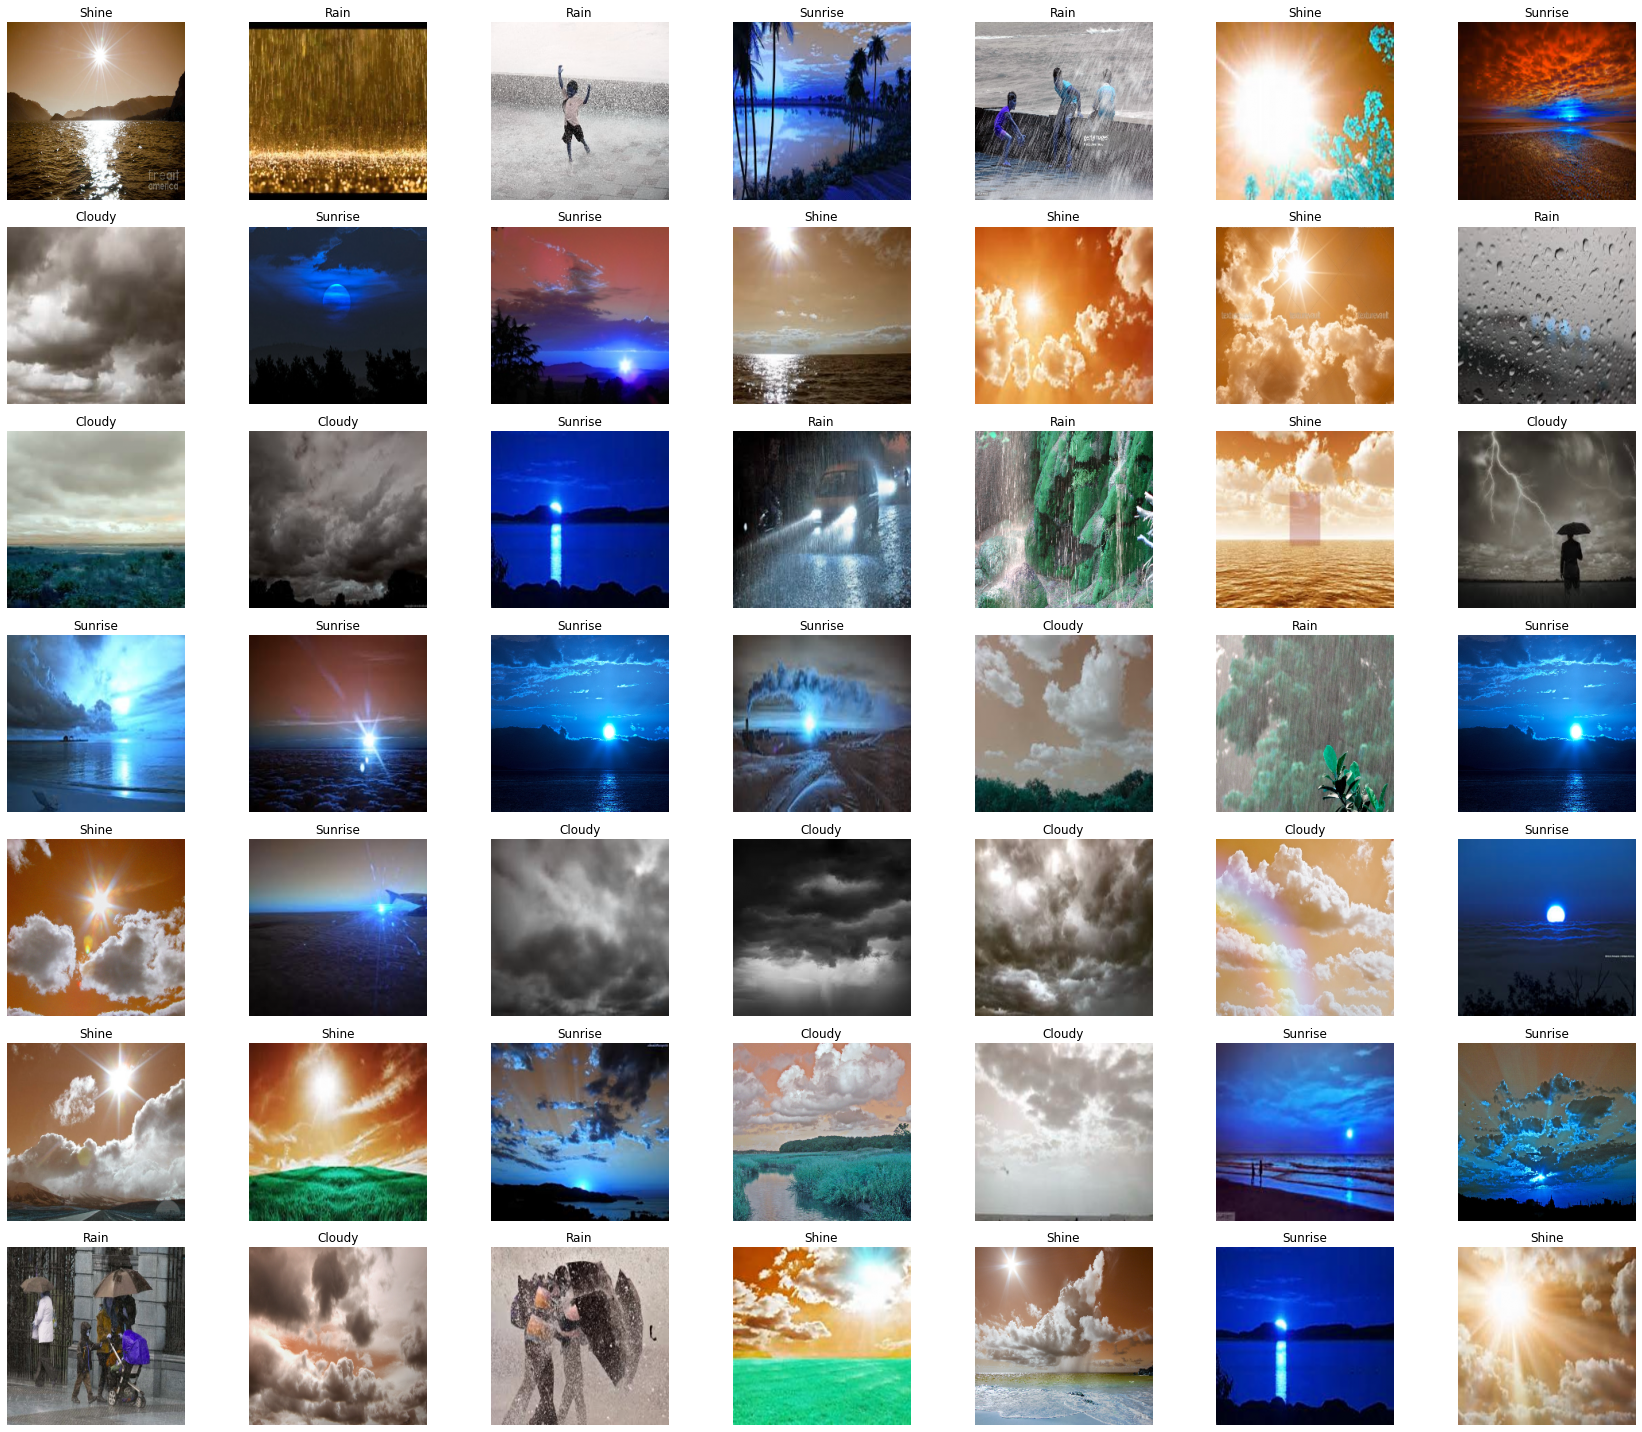

In [ ]:
import random

CLASS_NAMES = np.array(['cloudy','rain', 'shine','sunrise',], dtype='<U10')

def show_batch(image_batch, label_batch):
  plt.figure(figsize=(25,20))
  for n in range(49):
      rnd = random.randint(0, len(image_batch))
      ax = plt.subplot(7,7,n+1)
      plt.imshow(image_batch[rnd])
      plt.title(CLASS_NAMES[np.argmax(label_batch[rnd]==1)].title())
      plt.axis('off')
      plt.tight_layout()
      fig = ax.get_figure()
      fig.savefig('data_visualization_fig.png')

      

show_batch(x_train, y_train)

# **Model**

In [ ]:
# CREATING OUR MODEL
my_model = create_classification_model()

# COMPILE THE MODEL
my_model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "resnet152v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________________________________________________________________________

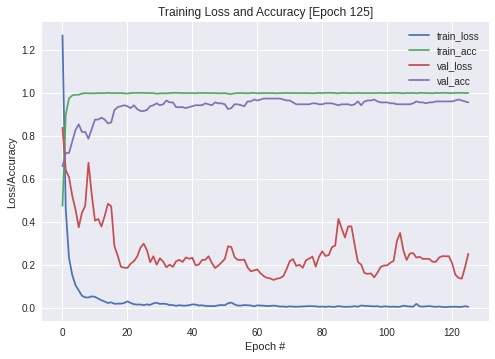

Restoring model weights from the end of the best epoch.
8/8 [==============================] - 16s 2s/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.2504 - val_accuracy: 0.9556
Epoch 00126: early stopping


In [ ]:
# EARLY STOPPING
early_stopping = EarlyStopping(monitor='val_loss', patience=60, verbose=1, restore_best_weights=True)

# TRAINING THE MODEL
my_model.fit(x_train, y_train, batch_size=128, epochs=200, validation_data=(x_test, y_test), callbacks=[plot_losses, early_stopping])

model_history = my_model.history.history

# IF YOU WANNA SAVE MODEL OR MODEL WEIGHTS
save_model(my_model, 'model_early_stop.h5')
my_model.save_weights('model_checkpoint_weights.h5')

# **Visualization accuracy and loss**

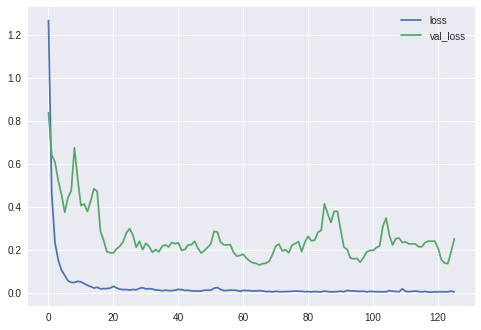

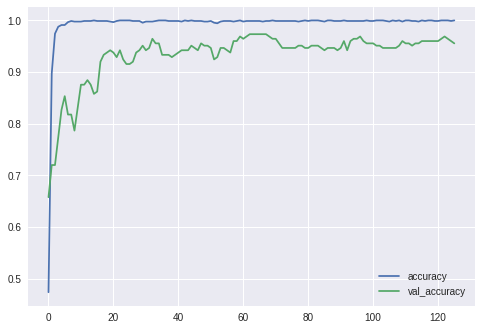

In [ ]:
loss_history_df = pd.DataFrame({'loss': model_history['loss'], 'val_loss': model_history['val_loss']})
loss_history_df_fig = loss_history_df.plot().get_figure()
loss_history_df_fig.savefig('loss_history_df_fig.png')

accuracy_history_df = pd.DataFrame({'accuracy': model_history['accuracy'], 'val_accuracy': model_history['val_accuracy']})
accuracy_history_df_fig = accuracy_history_df.plot().get_figure()
accuracy_history_df_fig.savefig('accuracy_history_df_fig.png')

plt.show()

# **Model prediction with test data**

Text(0.5, 1.0, 'shine')

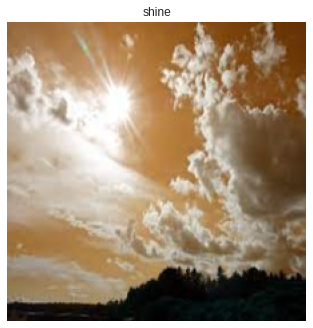

In [ ]:
# NOW WE CAN USE OUR MODEL TO PREDICT A TEST IMAGE
plt.imshow(x_test[10])
plt.axis('off')
image_class = my_model.predict(x_test[10].reshape(1, 224, 224, 3))
class_number = np.argmax(image_class)
plt.title(CLASS_NAMES[class_number])

Text(0.5, 1.0, 'cloudy')

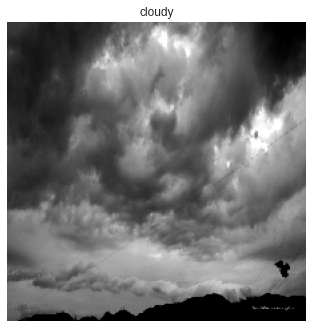

In [ ]:
plt.imshow(x_test[97])
plt.axis('off')
image_class = my_model.predict(x_test[97].reshape(1, 224, 224, 3))
class_number = np.argmax(image_class)
plt.title(CLASS_NAMES[class_number])

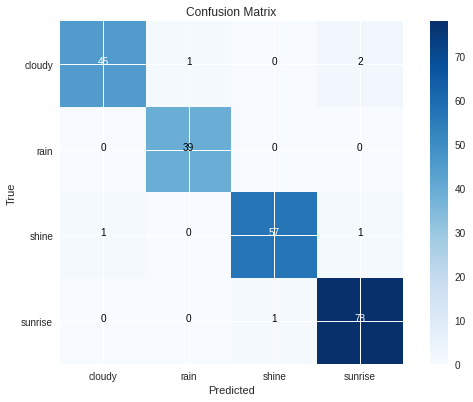

In [ ]:
# NOW WE CAN USE OUR MODEL TO PREDICT TEST IMAGES AND GET THE CONFUSION MATRIX

predicted = my_model.predict(x_test)
class_names = [0, 1, 2, 3]

cm = metrics.confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predicted, axis=1), class_names)
# print(cm)
cmap = plt.get_cmap('Blues')
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(ticks = range(0,len(CLASS_NAMES)) ,labels = CLASS_NAMES)
plt.yticks(ticks = range(0,len(CLASS_NAMES)) ,labels = CLASS_NAMES)
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix.png')
plt.show()